# Description

In this notebook, I will explore the dataset

In [23]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import string 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from collections import Counter

from config import *
from utils import *

[nltk_data] Downloading package stopwords to /home/thaiv7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/thaiv7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Read dataset

In [24]:
PATH_FILE_RAW_DATA = os.path.join("data", "BBC News Train.csv")

In [25]:
df = pd.read_csv(PATH_FILE_RAW_DATA)
print(f"Shape of df: {df.shape}")
df.head()

Shape of df: (1490, 3)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [26]:
idx = np.random.randint(0, len(df))
print(f"Sample text: {df.loc[idx, 'Text']}")
print(f"Label: {df.loc[idx, 'Category']}")

Sample text: can yahoo dominate next decade  yahoo has reached the grand old age of 10 and  in internet years  that is a long time.  for many  yahoo remains synonymous with the internet - a veteran that managed to ride the dot-com wave and the subsequent crash and maintain itself as one of the web s top brands. but for others there is another  newer net icon threatening to overshadow yahoo in the post dot-com world - google.  the veteran and the upstart have plenty in common - yahoo was the first internet firm to offer initial public shares and google was arguably the most watched ipo (initial public offering) of the post-dot-com era. both began life as search engines although in 2000  when yahoo chose google to power its search facility while it concentrated on its web portal business  it was very much yahoo that commanded press attention. in recent years  the column inches have stacked up in google s favour as the search engine also diversifies with the launch of services such as gma

# 2. Text preprocessing

In [27]:
df['Text'] = df['Text'].apply(preprocess_text)

In [7]:
idx = np.random.randint(0, len(df))
print(f"Sample text: {df.loc[idx, 'Text']}")
print(f"Label: {df.loc[idx, 'Category']}")

Sample text: keegan hail comeback king fowler manchest citi boss kevin keegan prais striker robbi fowler landmark return form yearold favour citi earlier season took premiership goal talli past brace monday win norwich still qualiti player know net got suppli ammunit end keegan said work hard get back former liverpool striker move citi poor stint leed battl back firstteam content struggl fit start season fowler overtook le ferdinand tuesday even becom third highest scorer time premiership goal trail alan shearer andi cole keegan believ still come former england forward get better suppli better ad keegan peopl want write kept articl peopl written could throw back would left bit egg face fowler doubl strike help citi come back two goal clinch dramat win carrow road keegan sympathis norwich boss nigel worthington afterward feel bit nigel worthington said team got great charact lot drive enthusiasm know killer blow norwich realli think brought someth premiership stadium atmospher great tou

# 3. Explore dataset

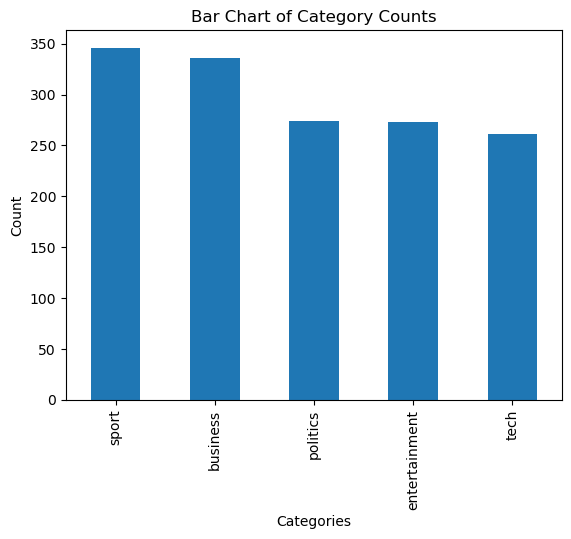

In [8]:
category_counts = df['Category'].value_counts()

category_counts.plot(kind='bar')

plt.title('Bar Chart of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show();

## 3.1 Analyze Text

In [9]:
average_length = df['Text'].str.split().apply(len).mean()
print(f"Average length of text: {average_length}")

max_length = df['Text'].str.split().apply(len).max()
print(f"Max length of text: {max_length}")

min_length = df['Text'].str.split().apply(len).min()
print(f"Min length of text: {min_length}")

Average length of text: 213.33959731543624 


In [10]:
# Tokenization
tokenized_text = df['Text'].str.split()
all_words = [word for tokens in tokenized_text for word in tokens]

vocab = set(all_words)
print(f"Number of words in vocab: {len(vocab)}")

Number of words in vocab: 17848


In [11]:
# Calculate word frequency
word_freq = dict(Counter(all_words))
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print("Ten MOST frequent words:")
for word, count in word_freq[:10]:
    print(f"{word}: {count}")

print("\nTen LEAST frequent words:")
for word, count in word_freq[-10:]:
    print(f"{word}: {count}")

Ten MOST frequent words:
said: 4838
mr: 2006
year: 1872
would: 1711
also: 1426
new: 1334
peopl: 1323
us: 1232
one: 1190
say: 1050

Ten LEAST frequent words:
verbalici: 1
stereophon: 1
rapport: 1
wharf: 1
glocer: 1
microsoftpartn: 1
secondgener: 1
unwelcom: 1
randomli: 1
tail: 1


In [14]:
threshold_rare_words = 3
list_rare_words = []

for (word, times) in word_freq:
    if times <= threshold_rare_words:
        list_rare_words.append(word)

list_rare_words = set(list_rare_words)
print(f"Number of least appear words (smaller than {threshold_rare_words}): {len(list_rare_words)}")

Number of least appear words (smaller than 3): 10645


In [15]:
def remove_rarewords(text, list_rare_words):
    """
    Custom function to remove rare words
    """
    return " ".join([word for word in str(text).split() if word not in list_rare_words])

In [19]:
df['Text'] = df['Text'].apply(lambda text: remove_rarewords(text, list_rare_words))

print(f"----- After remove rare words: -----")

average_length = df['Text'].str.split().apply(len).mean()
print(f"Average length of text: {average_length}")

max_length = df['Text'].str.split().apply(len).max()
print(f"Max length of text: {max_length}")

min_length = df['Text'].str.split().apply(len).min()
print(f"Min length of text: {min_length}")

tokenized_text = df['Text'].str.split()
all_words = [word for tokens in tokenized_text for word in tokens]

vocab = set(all_words)
print(f"Number of words in vocab: {len(vocab)}")

----- After remove rare words: -----
Average length of text: 202.5959731543624
Max length of text: 1597
Min length of text: 45
Number of words in vocab: 7203


# 4. Save processed text

In [22]:
PATH_OUTPUT_PROCESSED_FILE = os.path.join("data", "bbc_news_data_processed.csv")

df.to_csv(PATH_OUTPUT_PROCESSED_FILE, index=False)
print(f"[INFO] Save file to disk")

[INFO] Save file to disk
